<a href="https://colab.research.google.com/github/ShaySen/github-slideshow/blob/master/ATMS_207_Week_5_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ATMS 207 Week 5 Homework

---
Due Wednesday, 30 September

In [2]:
!pip install gdown
!gdown https://drive.google.com/uc?id=1VX1W21lk3faOYKZJh4kYdS4XnUrPdMyv #get weather data file
!gdown https://drive.google.com/uc?id=1L5TeDFIE154LDrmEhyezX7udY5ctwpGP #get NAO file
!gdown https://drive.google.com/uc?id=110E8u-TbkOKO9AyiR16C3tZs_Agthce3 #get PDO file
!gdown https://drive.google.com/uc?id=1OjIbewvxVCVQy_Jk5YF2gLWiyj_hdwMq #get ENSO file

Downloading...
From: https://drive.google.com/uc?id=1VX1W21lk3faOYKZJh4kYdS4XnUrPdMyv
To: /content/IllinoisStateWaterSurvey_wxdata.csv
100% 1.34M/1.34M [00:00<00:00, 88.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1L5TeDFIE154LDrmEhyezX7udY5ctwpGP
To: /content/nao.data
100% 6.06k/6.06k [00:00<00:00, 5.11MB/s]
Downloading...
From: https://drive.google.com/uc?id=110E8u-TbkOKO9AyiR16C3tZs_Agthce3
To: /content/pdo.data
100% 6.54k/6.54k [00:00<00:00, 5.58MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OjIbewvxVCVQy_Jk5YF2gLWiyj_hdwMq
To: /content/censo.data
100% 6.26k/6.26k [00:00<00:00, 12.2MB/s]





## Problem 1

I've included some monthly climate index data for 3 global climate index values, for the El Nino Southern Oscillation, the North Atlantic Oscillation, and the Pacific Decadal Oscillation.  The climate indicies are loaded into a `pandas` data frame called `climate_inds`.

In [3]:
# Data prep again - daily weather data is in daily_data and climate index data is in climate_inds

#load in numpy and pandas

import numpy as np
import pandas as pd

#We'll use pandas to read the file - grab these files using the cell above if you don't have them

data=pd.read_table('censo.data',delim_whitespace=True,header=None,skiprows=1,skipfooter=2)
data2=pd.read_table('pdo.data',delim_whitespace=True,header=None,skiprows=1,skipfooter=4)
data3=pd.read_table('nao.data',delim_whitespace=True,header=None,skiprows=0,skipfooter=0)

newdf=pd.DataFrame()
newdf2=pd.DataFrame()
newdf3=pd.DataFrame()

newdf['Date']=pd.date_range(start=pd.datetime(1948,1,1),end=pd.datetime(2016,12,1),freq="MS")
newdf2['Date']=pd.date_range(start=pd.datetime(1948,1,1),end=pd.datetime(2017,12,1),freq="MS")
newdf3['Date']=pd.date_range(start=pd.datetime(1950,1,1),end=pd.datetime(2018,1,1),freq="MS")
newdf['ENSO']=data.loc[:,1:].stack().values
newdf2['PDO']=data2.loc[:,1:].stack().values
newdf3['NAO']=data3.loc[:,1:].stack().values
newdf_all=pd.merge(newdf,newdf2,how='inner',on='Date')
climate_inds=pd.merge(newdf_all,newdf3,how='inner',on='Date')
climate_inds

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
/usr/local/lib/python3.6/dist-

,Date,ENSO,PDO,NAO
0,1950-01-01,-0.74,-2.13,0.92
1,1950-02-01,-1.70,-2.91,0.40
2,1950-03-01,-1.43,-1.13,-0.36
3,1950-04-01,-1.29,-1.20,0.73
4,1950-05-01,-1.22,-2.23,-0.59
...,...,...,...,...
799,2016-08-01,-0.93,0.52,-1.65
800,2016-09-01,-1.25,0.45,0.61
801,2016-10-01,-0.25,0.56,0.41
802,2016-11-01,-0.14,1.88,-0.16


(a) Plot a histogram of the ENSO, PDO, NAO index.  What is the mean and standard deviation of these datasets?  Do they visually make sense given your histograms?

mean of ENSO 0.05434079601990053
SD of ENSO 1.008876247053137
mean of PDO -0.07320895522388057
SD of PDO 1.1244696488405481
mean of NAO -0.018644278606965287
SD of NAO 1.0110218602090146


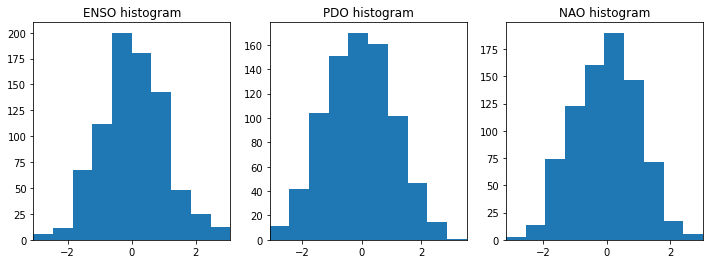

In [70]:
import matplotlib.pyplot as plt
import numpy as np

e = climate_inds["ENSO"]
p = climate_inds["PDO"]
n = climate_inds["NAO"]

fig, axes = plt.subplots(1, 3, figsize=(12,4))

axes[0].hist(e)
axes[0].set_title("ENSO histogram")
axes[0].set_xlim((min(e), max(e)))

mean=np.mean(e)
print('mean of ENSO', mean)
SD=np.std(e)
print('SD of ENSO', SD)


axes[1].hist(p)
axes[1].set_title("PDO histogram")
axes[1].set_xlim((min(p), max(p)))

mean=np.mean(p)
print('mean of PDO', mean)
SD=np.std(p)
print('SD of PDO', SD)

axes[2].hist(n)
axes[2].set_title("NAO histogram")
axes[2].set_xlim((min(n), max(n)))

mean=np.mean(n)
print('mean of NAO', mean)
SD=np.std(n)
print('SD of NAO', SD)

# yes these mean and SD values make sense given the historgrams


(b) Plot a time series of the climate data index values for ENSO, PDO, NAO, with the x-axis being labeled as "Time (years)", the y-axis being "Climate indices", and add a legend entry for each index.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

0     -0.74
1     -1.70
2     -1.43
3     -1.29
4     -1.22
       ... 
799   -0.93
800   -1.25
801   -0.25
802   -0.14
803   -0.39
Name: ENSO, Length: 804, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  import sys


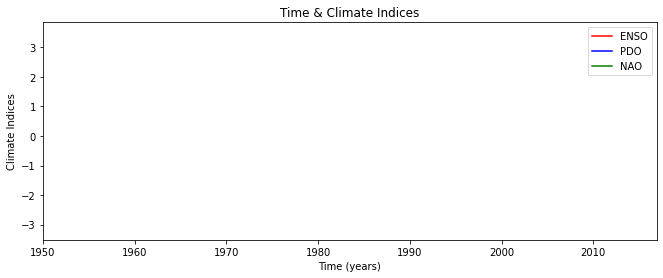

In [31]:
fig, axes = plt.subplots(figsize=(11,4))

axes.plot(climate_inds.index,e,'r')
axes.plot(climate_inds.index,p,'b')
axes.plot(climate_inds.index,n,'g')
axes.set_xlim(pd.datetime(1950,1,1),pd.datetime(2016,12,1))
axes.set_ylabel('Climate Indices')
axes.set_xlabel('Time (years)')
axes.set_title('Time & Climate Indices')
axes.legend(['ENSO','PDO','NAO'])

fig.savefig('time_series.pdf')

(c) Plot a scatter plot using the `plt.plot` command of ENSO versus PDO, for the period 1950-2016.  Be sure to label each plot accordingly (titles, axis labels, units if applicable).

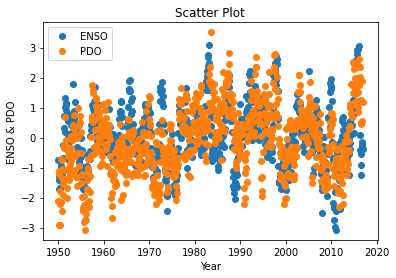

In [51]:
x =climate_inds['Date']

#for date in climate_inds["Date"]:
#  if int(date.year) < 2017:
#   x.append(date)
#print(x)
y1= e
y2= p

plt.figure() # initialize a figure
plt.plot(x, y1, 'o', label='ENSO')  #create a scatter plot

plt.plot(x, y2,'o',label='PDO')  #create a scatter plot

plt.xlabel('Year')  #label the xaxis
plt.ylabel('ENSO & PDO')  #label the yaxis
plt.title('Scatter Plot')  #label the title
plt.legend(['ENSO', 'PDO'])  #create a legend
plt.show()  #show it

(d) Plot a scatter plot using the `plt.scatter` command of NAO versus PDO, coloring by the value of ENSO for the period 1950-2016.  Be sure to label each plot accordingly (titles, axis labels, units if applicable).  Include a colorbar for the value of the ENSO index.

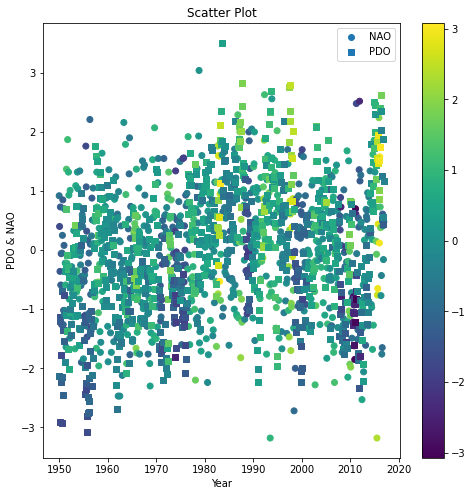

In [68]:
y1= climate_inds['NAO']
colors = climate_inds['ENSO']
plt.figure(figsize=(8, 8))
plt.scatter(x, y1,c=colors,marker='o', label='NAO')
plt.scatter(x, y2, c=colors,marker='s', label='PDO')

plt.xlabel('Year')  #label the xaxis
plt.ylabel('PDO & NAO')  #label the yaxis
plt.title('Scatter Plot')  #label the title
plt.legend()
plt.colorbar()
plt.show()  #show it